

# Project2: Investigate No-Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.<br><br>
● "ScheduledDay" tells us on what day the patient set up their appointment.<br>
● "Neighborhood" indicates the location of the hospital.<br>
● "Scholarship" indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>
● "No-show" it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [55]:
# importing the packages that I need

import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns

%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

Starting with loading the data and see how the data looks like.


In [56]:
# Loading the data and printing out a few lines. 
df=pd.read_csv('NoShowDataset.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [57]:
df.shape

(110527, 14)

In [58]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

*We notice there are no missing values*

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [60]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


  <font size="3">We notice that the average age of the patients is 37, and also there is a mistake in the minimum age because it can not be -1</font>



### Data Cleaning 

In [61]:
# Here I will drop some columns that I don't need them for my analysis
df.drop(['PatientId' , 'AppointmentID' , 'Neighbourhood', 'Scholarship', 'Hipertension', 'AppointmentDay' , 'ScheduledDay'], axis=1, inplace=True)

In [62]:
df.head(10)

,Gender,Age,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,0,0,0,No
1,M,56,0,0,0,0,No
2,F,62,0,0,0,0,No
3,F,8,0,0,0,0,No
4,F,56,1,0,0,0,No
5,F,76,0,0,0,0,No
6,F,23,0,0,0,0,Yes
7,F,39,0,0,0,0,Yes
8,F,21,0,0,0,0,No
9,F,19,0,0,0,0,No


In [63]:
#Now I fix the negative age by replacing the mean

Avg_Age = df['Age'].mean()
df[df['Age'] <=0] = Avg_Age

df.describe()

,Age,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,1.259761,1.218296,1.210135,1.500806
std,22.104561,6.522499,6.527195,6.528421,6.489885
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,37.088874,37.088874,37.088874,37.088874


In [64]:
df.head(15)

,Gender,Age,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62.0,0.0,0.0,0.0,0.0,No
1,M,56.0,0.0,0.0,0.0,0.0,No
2,F,62.0,0.0,0.0,0.0,0.0,No
3,F,8.0,0.0,0.0,0.0,0.0,No
4,F,56.0,1.0,0.0,0.0,0.0,No
5,F,76.0,0.0,0.0,0.0,0.0,No
6,F,23.0,0.0,0.0,0.0,0.0,Yes
7,F,39.0,0.0,0.0,0.0,0.0,Yes
8,F,21.0,0.0,0.0,0.0,0.0,No
9,F,19.0,0.0,0.0,0.0,0.0,No


In [65]:
#Here I'm saparating between the patients who come and not come to the appointments
Show_up = df['No-show'] == 'No'
Noshow_up = df['No-show'] == 'Yes'
df['Show_up'] = Show_up
df['Noshow_up'] = Noshow_up

<a id='eda'></a>
## Exploratory Data Analysis




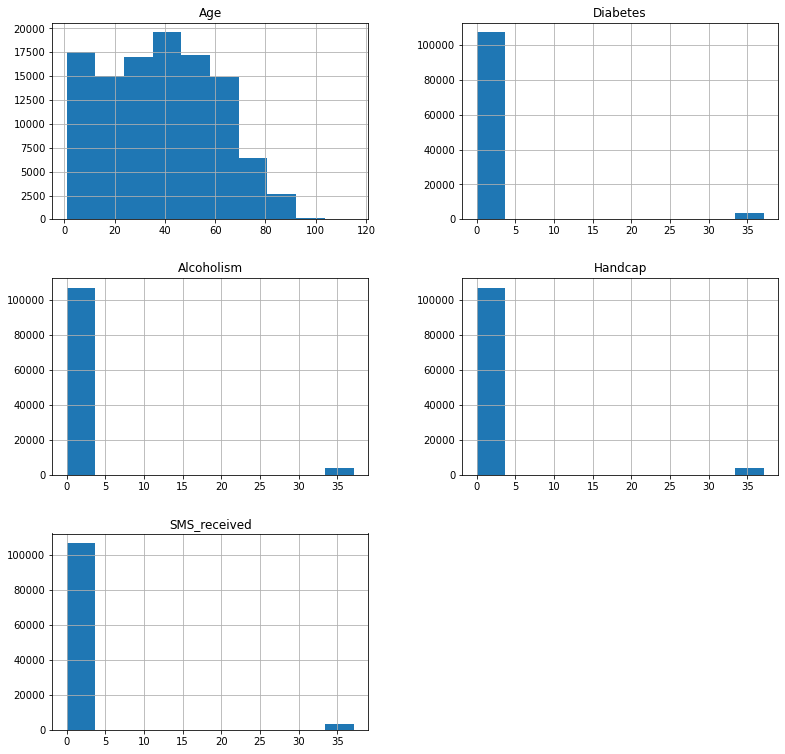

In [66]:
df.hist(figsize= (13,13));

### Q1: How many patients show up in the appointments? And how many do not show up?

Patients Show Up: 
77.18204601590561

Patients Not Show Up: 
22.817953984094384


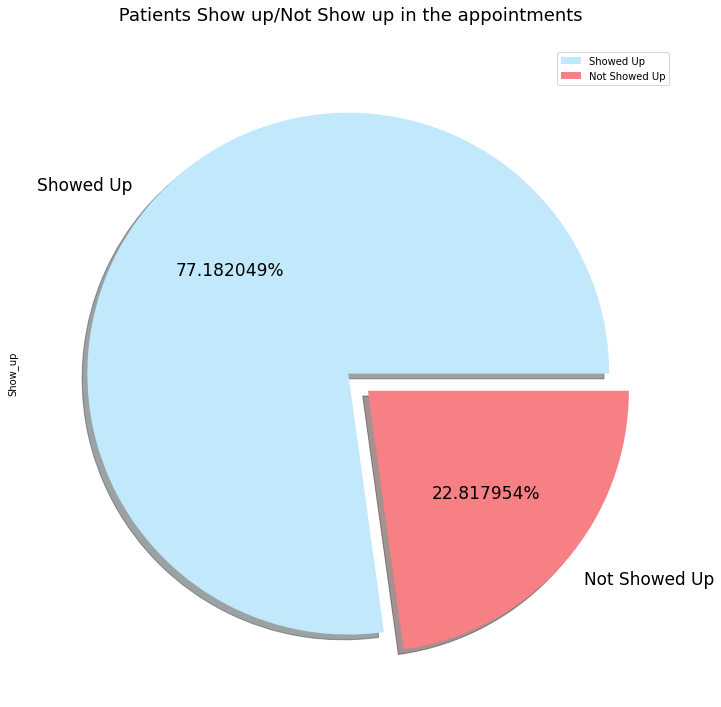

In [67]:
# Exploring using the Pie Chart 

Patient_showUp = df['Show_up'].value_counts()

def Pshow():
    print(Patient_showUp[1] / Patient_showUp.sum() * 100)

def PNotshow():
    print(Patient_showUp[0] / Patient_showUp.sum() * 100)

print('Patients Show Up: ')
Pshow()
print('\nPatients Not Show Up: ')
PNotshow()
labels =['Showed Up','Not Showed Up']
colors = ['#c2e9fb','#f68084']
explode = (0, 0.1)
chart = Patient_showUp.plot.pie(figsize=(12,12), autopct='%2f%%', fontsize = 17,colors=colors,explode=explode,labels=labels, shadow=True);
chart.set_title(' Patients Show up/Not Show up in the appointments\n', fontsize = 18);
mtp.legend()

<font size="3"> We notice that in the figure above, the patients who come to the appointments are more than the patients who did not show up.</font>

### Q2: Does the show up affected by the patients who received SMS ?

Text(0, 0.5, 'Patients')

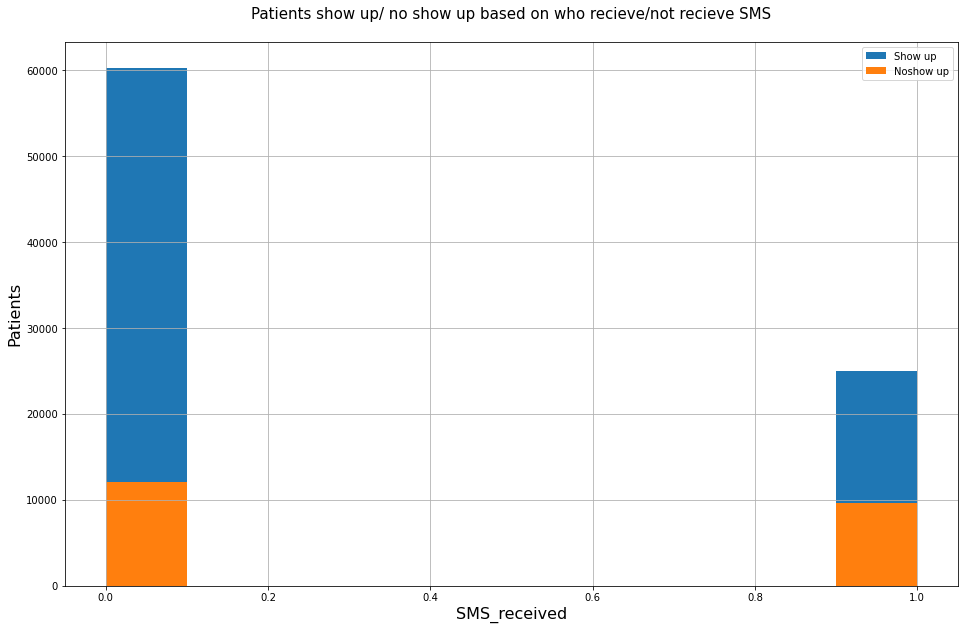

In [68]:

mtp.figure(figsize=[16,10])

df.SMS_received[Show_up].hist(alpha=1,label='Show up')
df.SMS_received[Noshow_up].hist(alpha=1,label='Noshow up')
mtp.legend()
mtp.title('Patients show up/ no show up based on who recieve/not recieve SMS\n',fontsize=15)
mtp.xlabel('SMS_received',fontsize=16)
mtp.ylabel('Patients',fontsize=16)

<font size="3">As we can see here in the figure above, patients who did not recieve SMS is showed up more than the patients who recieved SMS, Which I think It does not make sense.</font>

Text(0.5, 1.0, 'Relationship between the characteristics\n')

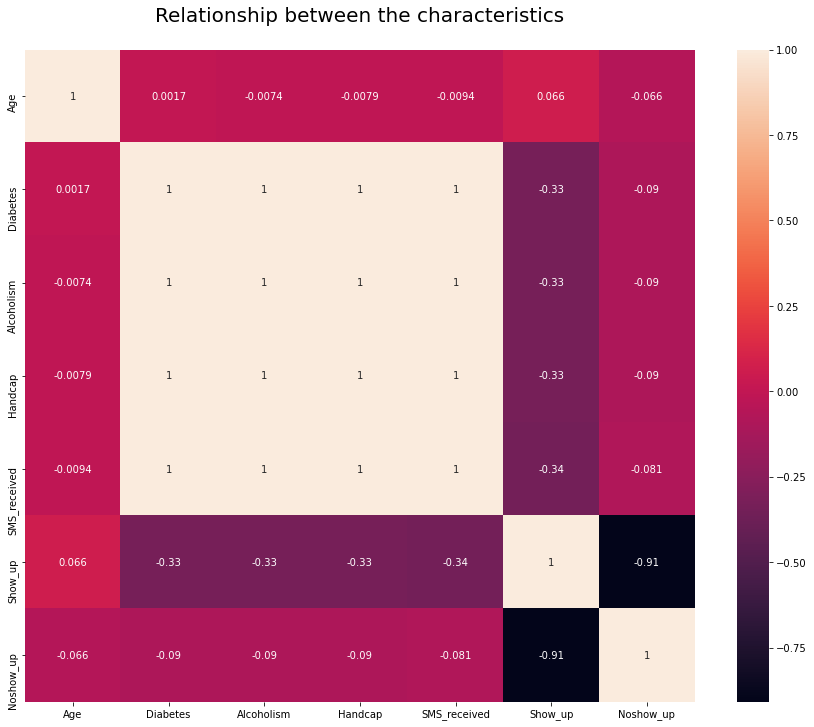

In [54]:
# Heatmap to show the correlation 
mtp.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True);

mtp.title('Relationship between the characteristics\n', fontsize = 20)

<a id='conclusions'></a>
## Conclusions



- Finally, the analysis shows that about 80% of patients show up to the appointments,whereas 20% of them did not show up.<br>
- Also, the analysis shows that patients who receive SMS show up to the appointments less than who did not receive SMS.

### Limitations:

- There is a limitation which is, I could not have the relationship between the gender and the patients who show and not show up.<br>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])